In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

%matplotlib inline 

Read the data.

In [100]:
df = pd.read_csv('data/ads.csv')
df.head()

,Time,Ads
0,2017-09-13T00:00:00,80115
1,2017-09-13T01:00:00,79885
2,2017-09-13T02:00:00,89325
3,2017-09-13T03:00:00,101930
4,2017-09-13T04:00:00,121630


Label encoding to convert the data.

In [101]:
le = LabelEncoder()

df['Time'] = le.fit_transform(df['Time'])

X = df.values
X[:5]

array([[     0,  80115],
       [     1,  79885],
       [     2,  89325],
       [     3, 101930],
       [     4, 121630]])

Initializing *K-Means* with count of clusters equals to 2.

In [102]:
kmeans = KMeans(2)
labels = kmeans.fit_predict(X)

Plot the original data.

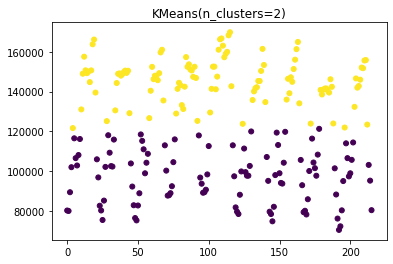

In [103]:
plt.title(kmeans)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25)

In [104]:
arr1, arr2 = [], []

for i, x in enumerate(labels):
    if x == 1:
        arr1.append(X[i])
    else:
        arr2.append(X[i])

In [105]:
arr1, arr2 = np.array([list(x) for x in arr1]), np.array([list(x) for x in arr2])

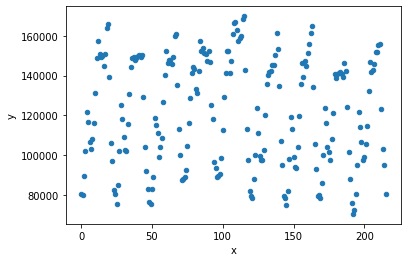

In [106]:
df=pd.DataFrame({'x':X[:, 0].tolist(),'y':X[:, 1].tolist()})
#print(df)
df.plot(x='x',y='y', kind='scatter')
plt.show()

In [107]:
#датафреймы каждого из двух классов
arr1X = arr1[:, 0].tolist()
arr1Y = arr1[:, 1].tolist()
arr2X = arr2[:, 0].tolist()
arr2Y = arr2[:, 1].tolist()

df1=pd.DataFrame({'x': arr1X,'y': arr1Y})
df2=pd.DataFrame({'x': arr2X,'y': arr2Y})


In [108]:
#вычисляем ковариационную матрицу
A=df.cov()
#вычисляем обратную к ковариационной
B=np.linalg.inv(A)
print(A)
print(B)
#проверка обратной матрицы
print(A.dot(B))

              x             y
x   3906.000000 -7.464676e+04
y -74646.755814  7.430753e+08
[[2.56508832e-04 2.57679850e-08]
 [2.57679850e-08 1.34834727e-09]]
              0             1
x  1.000000e+00  2.294562e-18
y  5.343287e-16  1.000000e+00


In [109]:
#вычисление векторов средних для каждого класса
mean_1=df1.mean()
mean_2=df2.mean()
print(mean_1)
print(mean_2)

x       106.900000
y    145822.545455
dtype: float64
x      108.122642
y    97225.613208
dtype: float64


In [110]:
#вектор разности средних
m=mean_1-mean_2
print(m)

x       -1.222642
y    48596.932247
dtype: float64


In [111]:
#коэффициенты функции Фишера
a=B.dot(m)
print(a)

[9.38626678e-04 6.54940360e-05]


In [112]:
#Функция Фишера: z=-0.000093859x- 0.000065494y
#вычисляем значения функции Фишера в центрах классов
e1=a.dot(mean_1)
e2=a.dot(mean_2)
print(e1)
print(e2)

9.650846235956902
6.469184608999791


In [113]:
#вычисляем порог а_0
a_0=(e1+e2)/2
print(a_0)

8.060015422478347


In [114]:
#проверка на обучающей выборке: 
#сравниваем значения функции Фишера на объектах с порогом
#ошибок нет, в 1 и 3 точках значение меньше порога, в остальных - больше
print(a.dot(df.iloc[0]))
print(a.dot(df.iloc[1]))
print(a.dot(df.iloc[2]))
print(a.dot(df.iloc[3]))
print(a.dot(df.iloc[4]))

5.247054695493579
5.232929693887724
5.852132020565248
6.678622971236247
7.969794107447117


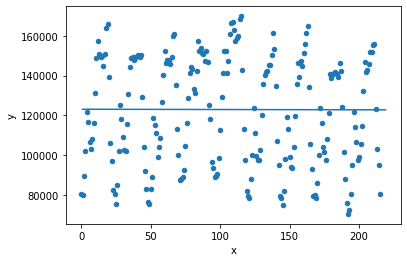

In [115]:
#визуализация: прямая z=0.000093859x+ 0.000065494y = 8.060015422478337, т.е. y=123064-1.43*x
#рисую изначальные точки
df.plot(x='x',y='y', kind='scatter')
#генерирую натуральные числа от 1 до 5
x1 = [i for i in range(1,220)]
#генерирую значения y=0.4x+2.1 в х от 1 до 5
y1 = [123064-1.43*i for i in x1]
#рисую прямую
plt.plot(x1,y1)
plt.show()